## Lewis mapping for tanker or bulkcarrier shape ship

In [1]:
import sympy as sym
#from sympy import Function, Symbol

import scipy.special as sci_spc
import scipy.integrate as sci_int
import numpy as np
import math as mat
import cmath as cmat
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import matplotlib.colors as mcolors

# MatPlotLib set LaTeX font
plt.rcParams['text.usetex'] = True

In [2]:
def lewis_coeff(rbt,bts):
    
    B = bts[0]*rbt
    T = bts[1]
    S = B*T*bts[2]

    print('B={:.2f}, T={:.2f}, S={:.4f}'.format(B,T,S))
    
    si = bts[2] #S/(B*T)
    H = B/(2*T)
    
    c1 = (3+4*si/mat.pi) + (1-4*si/mat.pi)*((H-1)/(H+1))**2
    a3 = (-c1 + 3 + mat.sqrt(9-2*c1))/c1
    a1 = (1 + a3)*(H-1)/(H+1)
    a = B/2 * (1 + a1 + a3)
    
    return correct_draft([a, a1, a3],T)

In [3]:
def correct_draft(cf,T):
    
    cf_n = cf
    [x,y] = lewis_point(cf,0)
    ts = T/y
    
    cf_n[0] = cf_n[0]*ts
    
    return cf_n

In [4]:
def lewis_map(cf,z):
    
    a = cf[0]
    a1 = cf[1]
    a3 = cf[2]
    
    w = a*(z + a1/z + a3/z**3)
    return w

In [5]:
def lewis_point(cf,th):
    
    a = cf[0]
    a1 = cf[1]
    a3 = cf[2]
    
    x = a*( (1+a1)*np.sin(th) - a3*np.sin(3*th))
    y = a*( (1-a1)*np.cos(th) + a3*np.cos(3*th))
    
    return [x,y]

In [6]:
def lewis_area(cf,th):
    
    dth = th[1]-th[0]
    print('dth={:.5g}'.format(dth))
    [x,y] = lewis_point(cf,th)
    
    r = np.sqrt(np.add(x**2,y**2))
    #print('r={}'.format(r))
    print('sum(r)={:.5f}'.format(np.sum(r)))
    
    #S = 2*(np.sum(r)*dth/2 - (r[0] + r[-1])*dth/4) 
    S = (np.sum(r) - r[-1]) * dth/2
    
    return S

In [7]:
def plot_cross_section(k,rbt,bts,hue,ax,s,e):
    
    th = np.linspace(s,e,50)
    x = np.sin(th)
    y = np.cos(th)
    z = x + 1j*y
    
    cf = lewis_coeff(rbt,bts)
    xl = lewis_point(cf,mat.pi/2)[0]
    yl = lewis_point(cf,0)[1]

    w = lewis_map(cf,z)
    #S = lewis_area(cf,th)

    #print('x_max={:.3f}, y_max={:.3f}, S={:.5f}'.format(xl,yl,S))
    color = (hue,1,1)
    ax.plot(w.real, w.imag, color=mcolors.hsv_to_rgb(color), label=r'${}$'.format(k))

B=0.80, T=0.20, S=0.0960
B=1.20, T=0.90, S=0.5400
B=1.60, T=1.00, S=1.0880
B=2.00, T=1.00, S=1.8600
B=2.00, T=1.00, S=2.0000
B=2.00, T=1.00, S=2.0000
B=2.00, T=1.00, S=1.8600
B=1.80, T=1.00, S=1.2240
B=1.20, T=1.00, S=0.6720
B=0.30, T=0.70, S=0.1176


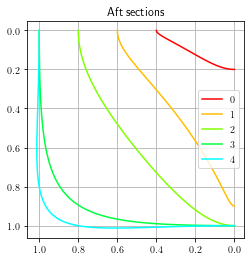

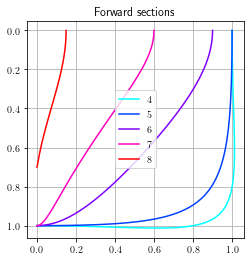

In [10]:
# Shape of a tanker, B,T,si
bts = [
    [0.8,0.2,0.6],
    [1.2,0.9,0.5],
    [1.6,1.0,0.68],
    [2.0,1.0,0.93],
    [2.0,1.0,1.00],
    [2.0,1.0,0.93],
    [1.8,1.0,0.68],
    [1.2,1.0,0.56],
    [0.3,0.7,0.56]
]

ns = len(bts)
hcol = np.linspace(0,1,ns)

# Ratio B/T
rbt = 1

# Aft half ship cross sections
fig, ax = plt.subplots()
for i in range(5):
    plot_cross_section(i,rbt,bts[i],hcol[i],ax,0,mat.pi/2)
    
ax.set_aspect(aspect=1)
ax.legend()
ax.grid(True)
plt.title('Aft sections')
fig.gca().invert_yaxis()
fig.gca().invert_xaxis()
fig.savefig('sections_aft.pdf')

# Fwd half ship cross sections
fig, ax = plt.subplots()
for i in range(4,9):
    plot_cross_section(i,rbt,bts[i],hcol[i],ax,0,mat.pi/2)
    
ax.set_aspect(aspect=1)
ax.legend()
ax.grid(True)
plt.title('Forward sections')
fig.gca().invert_yaxis()
fig.savefig('sections_fwd.pdf')

B=0.80, T=0.20, S=0.0960
B=1.20, T=0.90, S=0.5400
B=1.60, T=1.00, S=1.0880
B=2.00, T=1.00, S=1.8600
B=2.00, T=1.00, S=2.0000
B=2.00, T=1.00, S=2.0000
B=2.00, T=1.00, S=1.8600
B=1.80, T=1.00, S=1.2240
B=1.20, T=1.00, S=0.6720
B=0.30, T=0.70, S=0.1176


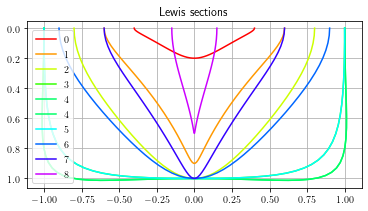

In [14]:
# ship cross sections
hcol = np.linspace(0,0.8,ns)
fig, ax = plt.subplots()
for i in range(5):
    plot_cross_section(i,rbt,bts[i],hcol[i],ax,-mat.pi/2,mat.pi/2)
for i in range(4,9):
    plot_cross_section(i,rbt,bts[i],hcol[i],ax,-mat.pi/2,mat.pi/2)
    
ax.set_aspect(aspect=1)
ax.legend()
ax.grid(True)
plt.title('Lewis sections')
fig.gca().invert_yaxis()
fig.savefig('sections.pdf')